In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
nx = 572
ny = 572


In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [5]:
x_test, y_test = generator(4)

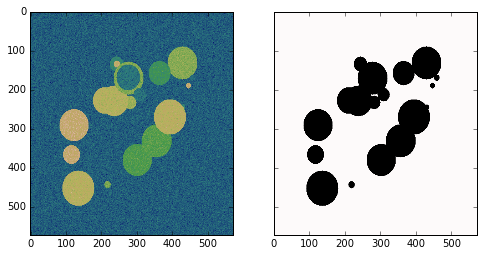

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

Layers 3, features 16, filter size 3x3, pool size: 2x2


In [8]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [25]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=100, display_step=2)

Removing '/Users/jakeret/workspace/tf_unet/prediction'
Removing '/Users/jakeret/workspace/tf_unet/unet_trained'
Allocating '/Users/jakeret/workspace/tf_unet/prediction'
Allocating '/Users/jakeret/workspace/tf_unet/unet_trained'
Verification error= 83.7%, loss= 0.8905
Start optimization
Iter 0, Minibatch Loss= 0.8355, Training Accuracy= 0.7892, Minibatch error= 21.1%
Iter 2, Minibatch Loss= 0.7610, Training Accuracy= 0.8298, Minibatch error= 17.0%
Iter 4, Minibatch Loss= 0.7138, Training Accuracy= 0.8298, Minibatch error= 17.0%
Iter 6, Minibatch Loss= 0.6526, Training Accuracy= 0.8471, Minibatch error= 15.3%
Iter 8, Minibatch Loss= 0.5661, Training Accuracy= 0.8882, Minibatch error= 11.2%
Iter 10, Minibatch Loss= 0.5670, Training Accuracy= 0.8754, Minibatch error= 12.5%
Iter 12, Minibatch Loss= 0.7203, Training Accuracy= 0.7689, Minibatch error= 23.1%
Iter 14, Minibatch Loss= 0.5867, Training Accuracy= 0.8676, Minibatch error= 13.2%
Iter 16, Minibatch Loss= 0.6408, Training Accuracy= 0.

KeyboardInterrupt: 

In [27]:
prediction = net.predict("./unet_trained/model.cpkt", x_test)

Model restored from file: ./unet_trained/model.cpkt


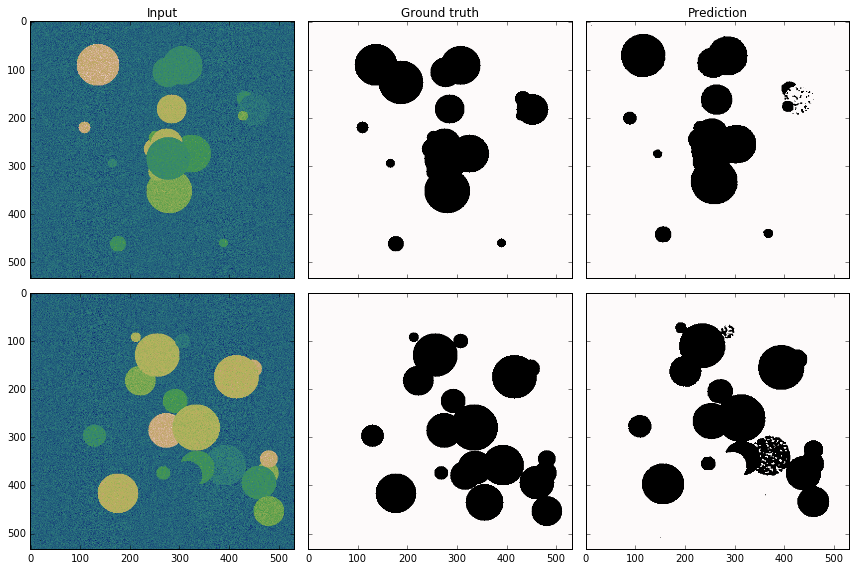

In [46]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,8))
for i in range(ax.shape[0]):
    ax[i, 0].imshow(x_test[i,...,0], aspect="auto")
    ax[i, 1].imshow(y_test[i,...,1], aspect="auto")
    mask = prediction[i,...,1] > 0.9
    ax[i, 2].imshow(mask, aspect="auto")
ax[0, 0].set_title("Input")
ax[0, 1].set_title("Ground truth")
ax[0, 2].set_title("Prediction")
fig.tight_layout()
fig.savefig("docs/toy_problem.png")